# Seaborn チートシート

In [3]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from IPython.display import display

## データの準備

## Boston Housingデータ

In [27]:
from sklearn.model_selection import train_test_split
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/'
                 'housing/housing.data',
                 header=None,
                 sep='\s+')
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 
              'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
display(df.head())

X=df.iloc[:,:df.shape[1]-1]
y=df['MEDV']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## Breast Cancer wisconsinのデータセット

In [18]:
import urllib
try:
    df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases'
                     '/breast-cancer-wisconsin/wdbc.data', header=None)
except urllib.error.URLError:
    df = pd.read_csv('https://raw.githubusercontent.com/rasbt/'
                     'python-machine-learning-book/master/code/'
                     'datasets/wdbc/wdbc.data', header=None)
print('rows, columns:', df.shape)
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X=df.iloc[:,2:]
y=df.iloc[:,1]
y=le.fit_transform(y)
# カテゴリ変数を数値データに変える
df.iloc[:,1]=le.fit_transform(df.iloc[:,1])

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
df.head()

rows, columns: (569, 32)


,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## sns.set(style='whitegrid',context='notebook')
グラフの見た目をスタイリッシュに変えることができる。matplotlibの画像すべてに当てはまる。  


## 散布図行列

## sns.pairplot( df , vars=cols, hue='class',palette='Blues' ,markers='s',size=2.5)
データ可視化で真っ先にやるべきpairplot表示。データセットの特徴量のペアに対する相関関係を一つにまとめられるので便利  
hueにカテゴリデータの列名を渡すと、クラスごとに色分けしてくれる varsにカラム名のリストを渡すことで、表示数r特徴量を指定することができる。

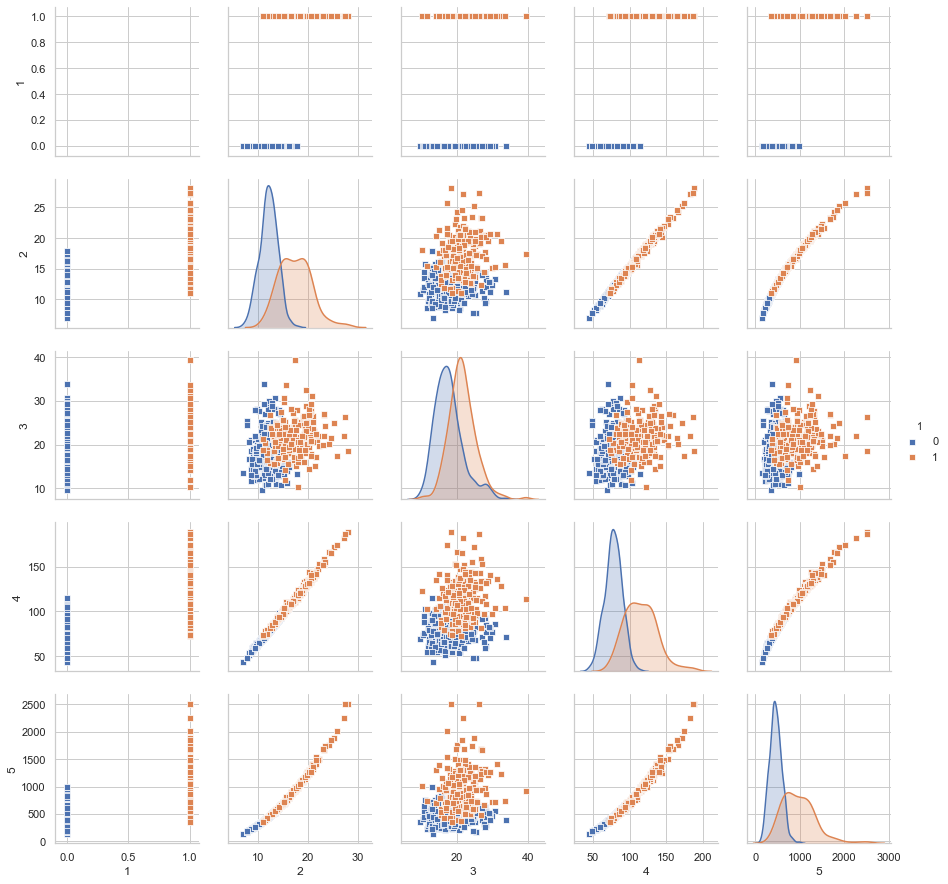

In [26]:
# Breast Cancerデータ
cols=[1,2,3,4,5]
sns.pairplot(df.iloc[:,cols],hue=1,markers='s',size=2.5)
plt.show()

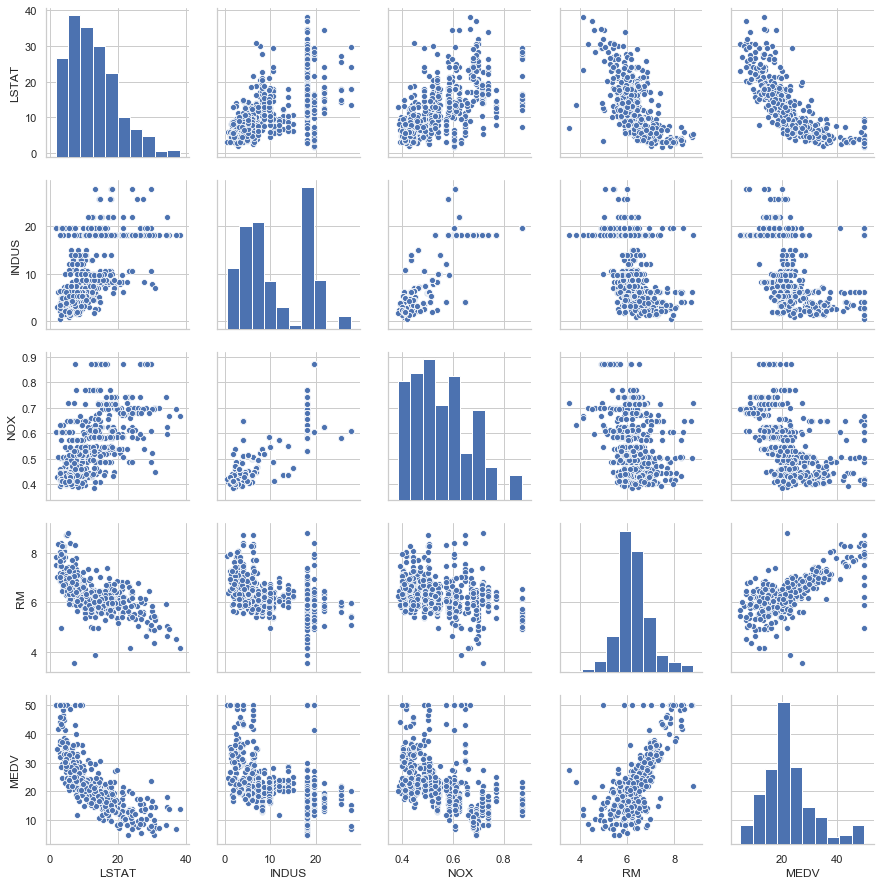

In [35]:
# Boston Housing データ
cols=['LSTAT','INDUS','NOX','RM','MEDV']
sns.pairplot(df,vars=cols,size=2.5)
plt.show()

## ヒートマップ図

## sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size':15},yticklabels=cols,xticklabels=cols)
ヒートマップ図を簡単に表示してくれる。cmに行列を入れる必要があり、大体ピアソンの積率相関係数を入れて、特徴量の線形相関関係を表すのに使う。  
cbarでカラーバーの表示、annotでデータ値の表示、squareで各短形の正方形化、fmtで数値の表示形式。annot_kwsでデータ値のサイズの設定、  
回帰問題の場合は注目すべきは、目的変数との相関が高い特徴量で、１に近いほど両社に線形関係がある。

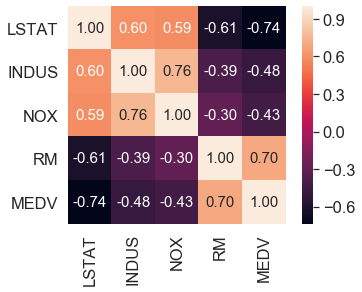

In [41]:
# Boston Housing データ
cols=['LSTAT','INDUS','NOX','RM','MEDV']
# ピアソンの積率相関係数を求める
cm=np.corrcoef(df[cols].values.T)

sns.set(font_scale=1.5)
hm=sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size':15},yticklabels=cols,xticklabels=cols)
plt.show()

In [38]:
cm.shape

(5, 5)